# Sección 1: Análisis de Datos


#### Import library

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Parte A: Análisis de un conjunto de datos

### DATA LOADING

In [112]:
df = pd.read_csv('customer_data.csv', sep = ',', na_values='#N/D')

In [113]:
df.head()

,CustomerID,Age,Location,TotalPurchases,LastPurchaseDate,LifetimeValue,Contacted,PurchaseProbability
0,1,62,West,1,4/3/2024 20:45,1898.15,Yes,0.49
1,2,65,South,5,45:50.9,5172.70,Yes,0.98
2,3,18,South,4,5/25/2024 20:45,5846.43,Yes,0.24
3,4,21,South,14,45:50.9,7896.67,No,0.37
4,5,21,North,12,45:50.9,6104.11,Yes,0.05


### BUSINESS ANALYTICS

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           100 non-null    int64  
 1   Age                  100 non-null    int64  
 2   Location             100 non-null    object 
 3   TotalPurchases       100 non-null    int64  
 4   LastPurchaseDate     100 non-null    object 
 5   LifetimeValue        100 non-null    float64
 6   Contacted            100 non-null    object 
 7   PurchaseProbability  100 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 6.4+ KB


### Perfil promedio  
- Calcular la edad promedio 
- ubicación más frecuente 
- frecuencia de compra promedio

In [115]:
age_average = df['Age'].mean() 
location_frequent = df['Location'].mode()[0]
frequency_average_purchase = df['TotalPurchases'].mean()

average_profile = {
    'Edad Promedio': age_average,
    'Ubicación Más Frecuente': location_frequent,
    'Frecuencia de Compra Promedio': frequency_average_purchase
}

average_profile


{'Edad Promedio': 41.57,
 'Ubicación Más Frecuente': 'East',
 'Frecuencia de Compra Promedio': 9.48}

Conclusiones: 

- `Edad Promedio: 41.57%,`
- `Ubicación Más Frecuente: 'East',`
- `Frecuencia de Compra Promedio: 9%`

### Identificar los 10 clientes con el mayor valor de vida (Lifetime Value)

In [116]:
top_10_lifetime_value = df.nlargest(10, 'LifetimeValue')[['CustomerID', 'LifetimeValue']]

top_10_lifetime_value

# Los siguientes CustomerID conrrespoenden a los 10 clientes con el mayor valor de vida 

,CustomerID,LifetimeValue
19,20,9851.82
28,29,9808.93
16,17,9745.16
40,41,9533.42
38,39,9269.51
75,76,9259.12
96,97,9114.39
72,73,8931.29
44,45,8840.31
79,80,8838.82


#### Explica cómo los seleccionaste

`El método nlargest()` de pandas se utiliza para obtener las filas con los valores más grandes en una columna o en varias columnas específicas de un DataFrame. Este método es muy útil cuando necesitas extraer las filas con los valores más altos según ciertos criterios.

### Encuentra las tres variables que más influyen en la probabilidad de que un cliente haga una compra.

 Cuantificar los valores de `location` para analizar si se encuentra dentro las tres varialbes que influyan en la probabilidad de compra

In [117]:
location_mapping = {'West': 1, 'South': 2, 'North': 3, 'East': 4}
df['Location_Quantified'] = df['Location'].map(location_mapping)

df

,CustomerID,Age,Location,TotalPurchases,LastPurchaseDate,LifetimeValue,Contacted,PurchaseProbability,Location_Quantified
0,1,62,West,1,4/3/2024 20:45,1898.15,Yes,0.49,1
1,2,65,South,5,45:50.9,5172.70,Yes,0.98,2
2,3,18,South,4,5/25/2024 20:45,5846.43,Yes,0.24,2
3,4,21,South,14,45:50.9,7896.67,No,0.37,2
4,5,21,North,12,45:50.9,6104.11,Yes,0.05,3
...,...,...,...,...,...,...,...,...,...
95,96,32,North,6,45:50.9,1013.38,No,0.39,3
96,97,33,West,13,45:50.9,9114.39,No,0.53,1
97,98,38,North,13,45:50.9,921.42,No,0.94,3
98,99,53,South,3,45:50.9,8023.75,No,0.89,2


In [118]:
# Seleccionar solo las columnas numericas
df_numerical = df.select_dtypes(include=['number'])

In [119]:
# Calcular la correlación entre la probabilidad de compra y las otras variables numéricas
correlations = df_numerical.corr()['PurchaseProbability'].drop('PurchaseProbability').abs()

# Seleccionar las tres variables con mayor correlación
influential_variables = correlations.nlargest(3)

influential_variables 

Age                    0.224970
LifetimeValue          0.219919
Location_Quantified    0.108288
Name: PurchaseProbability, dtype: float64

Conclusiones:

las tres variables que más influyen en la probabilidad de que un cliente haga una compra son 
- `age with 22%`
- `LifetimeValue with 21%`
- `Location with  10%`

## Parte B: Generación de Estrategias de Marcación 

### Describa una estrategia para priorizar las llamadas a clientes, incluyendo cualquier segmentación de clientes que considere relevante

### Estrategia para Priorizar las Llamadas a Clientes

- Segmentación por Valor de Vida `LifetimeValue`: Priorizar clientes con un alto valor de vida

In [120]:
## Segmentación por Valor de Vida (Lifetime Value)
top_10_lifetime_value

,CustomerID,LifetimeValue
19,20,9851.82
28,29,9808.93
16,17,9745.16
40,41,9533.42
38,39,9269.51
75,76,9259.12
96,97,9114.39
72,73,8931.29
44,45,8840.31
79,80,8838.82


- Segmentación por Probabilidad de Compra `PurchaseProbability`: Utilizar la probabilidad de compra como indicador para centrar los esfuerzos en clientes más propensos a realizar compras.


In [121]:
top_10_Purchase_Probability = df.nlargest(10, 'PurchaseProbability')[['CustomerID', 'PurchaseProbability']]

## Segmentación por Probabilidad de Compra (PurchaseProbability)
top_10_Purchase_Probability


,CustomerID,PurchaseProbability
1,2,0.98
72,73,0.98
77,78,0.98
23,24,0.97
79,80,0.97
88,89,0.97
69,70,0.96
28,29,0.94
97,98,0.94
16,17,0.93


# Sección 2: Análisis de Causa Raíz 

In [123]:
df_service = pd.read_csv('service_campaign_data.csv', sep = ',', na_values='#N/D')

df_service.head(12)

,CaseID,ResolutionTime,CustomerSatisfaction,NumberOfInteractions,ComplaintType,Resolved,CustomerFeedback
0,1,34,2,7,Service,Yes,Negative
1,2,24,4,3,Product,No,Positive
2,3,13,1,4,Product,No,Negative
3,4,6,4,6,Service,Yes,Neutral
4,5,39,3,8,Product,Yes,Positive
5,6,2,2,1,Product,No,Positive
6,7,11,1,8,Service,No,Positive
7,8,7,1,2,Product,No,Positive
8,9,7,4,3,Service,No,Positive
9,10,39,5,6,Other,Yes,Positive


In [124]:
df_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CaseID                100 non-null    int64 
 1   ResolutionTime        100 non-null    int64 
 2   CustomerSatisfaction  100 non-null    int64 
 3   NumberOfInteractions  100 non-null    int64 
 4   ComplaintType         100 non-null    object
 5   Resolved              100 non-null    object
 6   CustomerFeedback      100 non-null    object
dtypes: int64(4), object(3)
memory usage: 5.6+ KB


 ## Calcular los indicadores clave de desempeño (KPIs)
Calcular los KPIs principales:

- Tiempo de resolución promedio.
- Satisfacción del cliente promedio.
- Número promedio de interacciones.
- Porcentaje de quejas resueltas.

In [125]:
# Calcular KPIs

avg_resolution_time = df_service["ResolutionTime"].mean()
avg_customer_satisfaction = df_service["CustomerSatisfaction"].mean()
avg_number_of_interactions = df_service["NumberOfInteractions"].mean()
resolution_rate = (df_service["Resolved"] == "Yes").mean() * 100


print(f"Tiempo de resolución promedio: {avg_resolution_time:.2f} horas")
print(f"Satisfacción del cliente promedio: {avg_customer_satisfaction:.2f} en una escala de 1 a 5")
print("Número Promedio de Interacciones:", avg_number_of_interactions)
print("Porcentaje de Quejas Resueltas:", resolution_rate,"%")

Tiempo de resolución promedio: 32.04 horas
Satisfacción del cliente promedio: 2.91 en una escala de 1 a 5
Número Promedio de Interacciones: 4.66
Porcentaje de Quejas Resueltas: 53.0 %



## Identificar patrones y correlaciones en los datos.

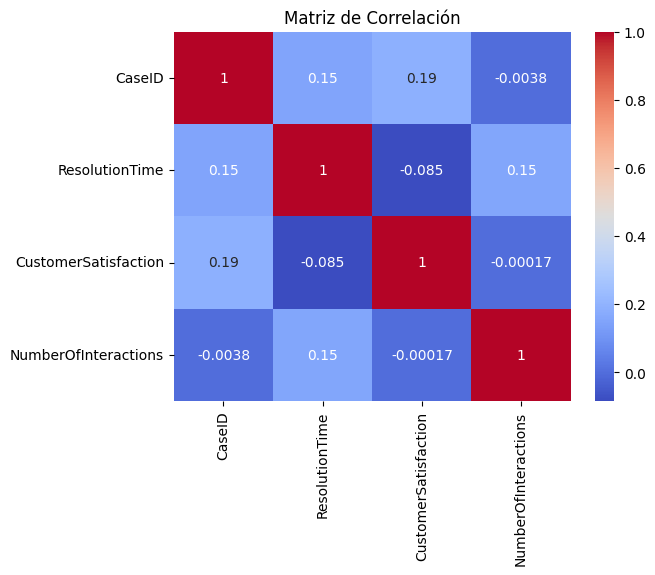

In [126]:
# Seleccionar solo las columnas numericas
df_service_numerical = df_service.select_dtypes(include=['number'])

# Calcular la correlación de los datos 
correlation_matrix = df_service_numerical.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

#### las correlaciones entre estas variables son bastante débiles. 

La correlación negativa entre el tiempo de resolución y la satisfacción del cliente, aunque baja, sugiere que es beneficioso para la satisfacción del cliente mantener los tiempos de resolución lo más cortos posible

## Análisis de causa raíz

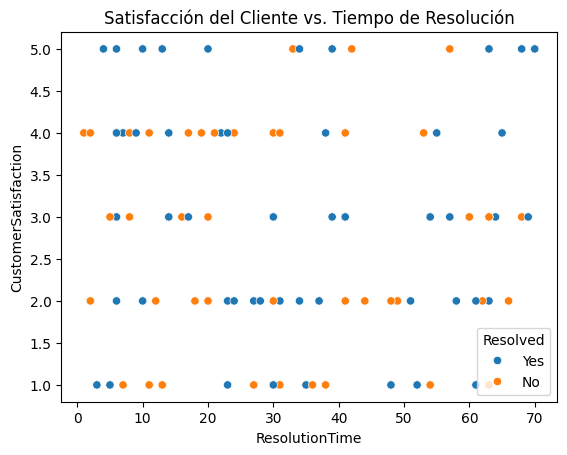

In [127]:
# Evaluar cómo la satisfacción del cliente está influenciada por el tiempo de resolución y el número de interacciones
sns.scatterplot(data=df_service, x="ResolutionTime", y="CustomerSatisfaction", hue="Resolved")
plt.title("Satisfacción del Cliente vs. Tiempo de Resolución")
plt.show()

El gráfico anterior de dispersión muestra la relación entre la satisfacción del cliente (CustomerSatisfaction) y el tiempo de resolución (ResolutionTime) de sus quejas, diferenciando si las quejas fueron resueltas (Resolved: Yes) o no (Resolved: No).

- Tiempo de Resolución:
   * No parece haber una tendencia clara entre el tiempo de resolución y la satisfacción del cliente. Los puntos están bastante dispersos a lo largo del eje de tiempo de resolución.

Resolver las quejas es crucial para la satisfacción del cliente, pero también es importante cómo se resuelven las quejas y otros factores que pueden influir en la percepción del cliente.

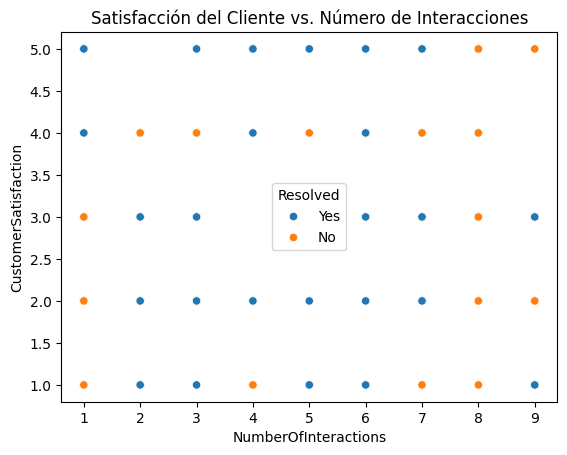

In [128]:
sns.scatterplot(data=df_service, x="NumberOfInteractions", y="CustomerSatisfaction", hue="Resolved")
plt.title("Satisfacción del Cliente vs. Número de Interacciones")
plt.show()


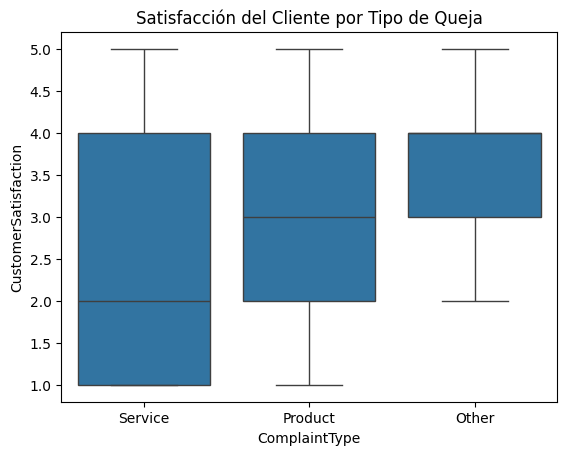

In [129]:
# Evaluar el impacto de los diferentes tipos de quejas
sns.boxplot(data=df_service, x="ComplaintType", y="CustomerSatisfaction")
plt.title("Satisfacción del Cliente por Tipo de Queja")
plt.show()

## Identifica las principales causas de insatisfacción del cliente.

In [130]:
insatisfied_customers = df_service[df_service["CustomerSatisfaction"] <= 2]
complaint_type_counts = insatisfied_customers["ComplaintType"].value_counts()
resolution_time_insatisfaction = insatisfied_customers["ResolutionTime"].mean()
interaction_counts_insatisfaction = insatisfied_customers["NumberOfInteractions"].mean()

print("Distribución por tipo de queja entre clientes insatisfechos:")
print(complaint_type_counts)

print(f"Tiempo de resolución promedio entre clientes insatisfechos: {resolution_time_insatisfaction:.2f} horas")
print(f"Número promedio de interacciones entre clientes insatisfechos: {interaction_counts_insatisfaction:.2f}")


# Análisis de la resolución de quejas
resolucion_insatisfaccion = insatisfied_customers["Resolved"].value_counts()

resolucion_insatisfaccion


Distribución por tipo de queja entre clientes insatisfechos:
ComplaintType
Service    21
Product    18
Other       4
Name: count, dtype: int64
Tiempo de resolución promedio entre clientes insatisfechos: 33.58 horas
Número promedio de interacciones entre clientes insatisfechos: 4.49


Resolved
Yes    22
No     21
Name: count, dtype: int64

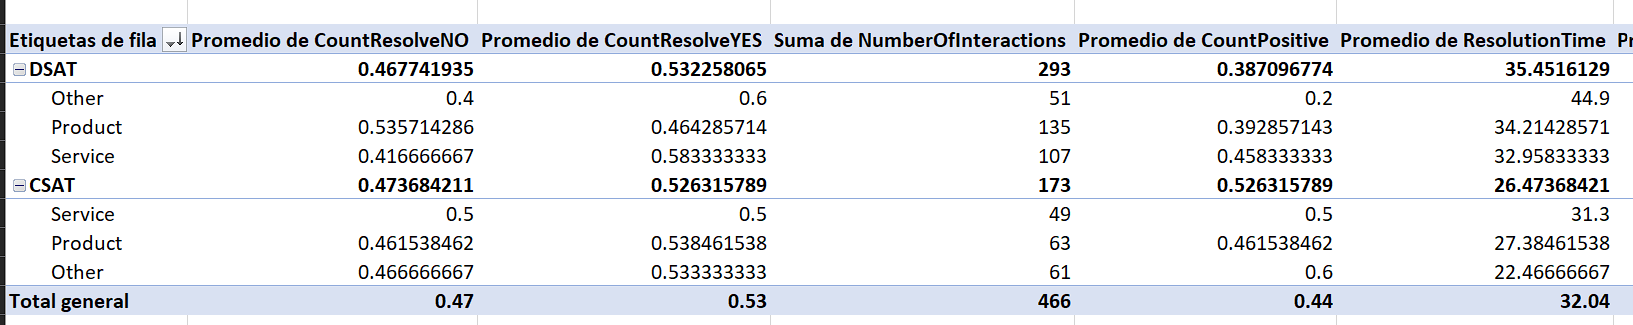

## Identifica las principales causas de insatisfacción del cliente.


- Una de las principales causas de insatisfacción del cliente es la demora en el tiempo de resolución. Se encontró que el tiempo de resolución aceptable (SCAT) es de 27 minutos, mientras que el grupo de clientes insatisfechos (DSAT) presenta un tiempo promedio de resolución de 34 minutos.

- Se obtiene mayor retroalimentación con respecto al servicio al cliente prestado por el grupo de agentes. Se encontró que, del 46% de los casos correspondientes a CSAT, no se les proporcionó una resolución. Esto indica que el agente pudo prestar un servicio óptimo y de calidad. Por el contrario, con los clientes insatisfechos (DSAT), el 46% de los casos resueltos recibieron una resolución a su caso, pero quedaron insatisfechos por el servicio o producto prestado por el agente.


## Proponer tres acciones específicas para mejorar el tiempo de resolución de las solicitudes de los clientes

- Análisis de Desempeño en Tiempo Real: Utilizar herramientas de análisis en tiempo real para monitorear el desempeño de los agentes, identificando áreas donde pueden mejorar en términos de velocidad y calidad de resolución.

- Sesiones de Retroalimentación y Coaching: Organizar sesiones regulares de retroalimentación y coaching para agentes, enfocándose en estrategias para mejorar la velocidad y eficiencia en la resolución de casos.

- Programas de Reconocimiento e Incentivos: Implementar programas de reconocimiento e incentivos que recompensen a los agentes por resolver casos rápidamente y mantener altos niveles de satisfacción del cliente, motivándolos a mantener un rendimiento óptimo.


## Medir el impacto de estas acciones en los KPIs

1.	Comparación de Períodos Temporales: Evaluar KPIs antes y después de implementar las acciones, utilizando análisis estadísticos para determinar diferencias significativas.

2.	Análisis de Cohortes: Crear grupos de control y prueba entre agentes para comparar desempeño y medir el impacto en los KPIs.

3.	Recolección de Datos y Feedback Continuo: Implementar encuestas continuas para clientes y agentes, analizando tanto datos cuantitativos como cualitativos.

4.	Uso de Herramientas Analíticas: Emplear herramientas avanzadas para monitorear cambios en tiempo real y generar informes periódicos sobre el impacto en los KPIs.
Estos enfoques permiten una evaluación efectiva y ajustes tácticos para mejorar continuamente los resultados.
